In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/avishma/Desktop'

/Users/avishma/Desktop


In [3]:
data=pd.read_csv('data.csv')

In [4]:
from pandas_profiling import ProfileReport

In [5]:
profile=ProfileReport(data,title='Data_Report')

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [67]:
data.isnull().sum().sort_values(ascending=False)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [68]:
(data.isnull().sum().sort_values(ascending=False))/data.shape[0]

origin                 0.0
cylinders              0.0
displacement           0.0
horsepower             0.0
weight                 0.0
acceleration           0.0
year                   0.0
name                   0.0
Kilometer_per_liter    0.0
dtype: float64

In [69]:
objectcols=data.select_dtypes(include=['object'])
numericcols=data.select_dtypes(include=np.number)

In [70]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cylinders   398 non-null    object
 1   horsepower  398 non-null    object
 2   name        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [71]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   displacement         398 non-null    float64
 2   weight               398 non-null    int64  
 3   acceleration         398 non-null    float64
 4   year                 398 non-null    int64  
 5   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [72]:
data.cylinders=data.cylinders.astype(object)

In [73]:
numericcols['Car Age']=2022-numericcols.year

In [74]:
numericcols=numericcols.drop('year',axis=1)

In [75]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cylinders   398 non-null    object
 1   horsepower  398 non-null    object
 2   name        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [76]:
objectcols=objectcols.drop('name',axis=1)

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [102]:
object_encode=objectcols.apply(le.fit_transform)

In [103]:
object_encode=pd.DataFrame(object_encode)

In [104]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        398 non-null    int64  
 1   displacement  398 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   Car Age       398 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.7 KB


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
S=StandardScaler()

In [107]:
numeric_s=S.fit_transform(numericcols)

In [108]:
numericcols.columns

Index(['origin', 'displacement', 'weight', 'acceleration', 'Car Age'], dtype='object')

In [109]:
numericcols=numericcols.drop('Kilometer_per_liter',axis=1)

KeyError: "['Kilometer_per_liter'] not found in axis"

In [110]:
numeric_s=pd.DataFrame(numeric_s,columns=['origin', 'displacement', 'weight', 'acceleration', 'Car Age'])

In [111]:
numeric_s.head()

,origin,displacement,weight,acceleration,Car Age
0,-0.715145,1.090604,0.630870,-1.295498,1.627426
1,-0.715145,1.503514,0.854333,-1.477038,1.627426
2,-0.715145,1.196232,0.550470,-1.658577,1.627426
3,-0.715145,1.061796,0.546923,-1.295498,1.627426
4,-0.715145,1.042591,0.565841,-1.840117,1.627426


In [112]:
numericcols.corr()
#Multicolinearity Check

,origin,displacement,weight,acceleration,Car Age
origin,1.000000,-0.609409,-0.581024,0.205873,-0.180662
displacement,-0.609409,1.000000,0.932824,-0.543684,0.370164
weight,-0.581024,0.932824,1.000000,-0.417457,0.306564
acceleration,0.205873,-0.543684,-0.417457,1.000000,-0.288137
Car Age,-0.180662,0.370164,0.306564,-0.288137,1.000000


In [113]:
import seaborn as sns

<AxesSubplot: >

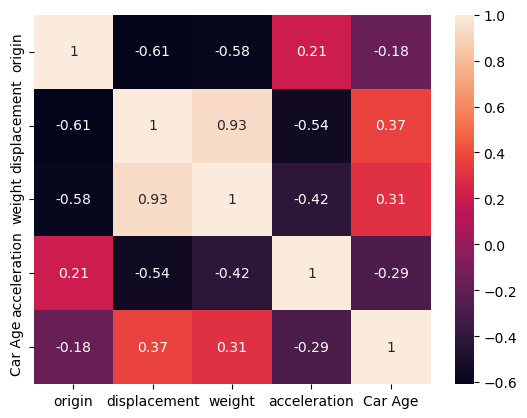

In [114]:
sns.heatmap(numericcols.corr(),annot=True)

In [115]:
combinedf=pd.concat([object_encode,numeric_s],axis=1)

In [116]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   horsepower    398 non-null    int64  
 2   origin        398 non-null    float64
 3   displacement  398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   Car Age       398 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 21.9 KB


In [117]:
combinedf['Kilometer_per_liter']=data.Kilometer_per_liter

In [118]:
y=combinedf.Kilometer_per_liter
X=combinedf.drop(['Kilometer_per_liter'],axis=1)

In [119]:
y.dtype

dtype('float64')

<AxesSubplot: ylabel='Frequency'>

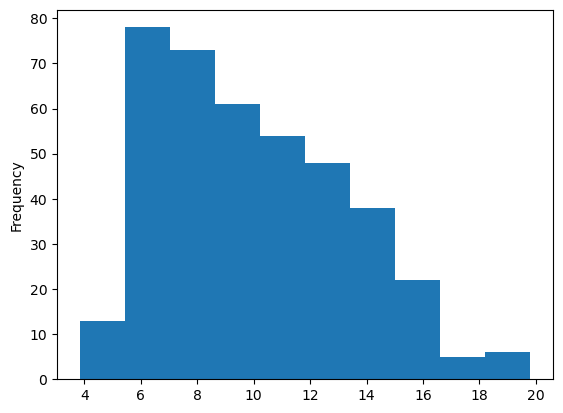

In [120]:
y.plot(kind='hist')

<AxesSubplot: >

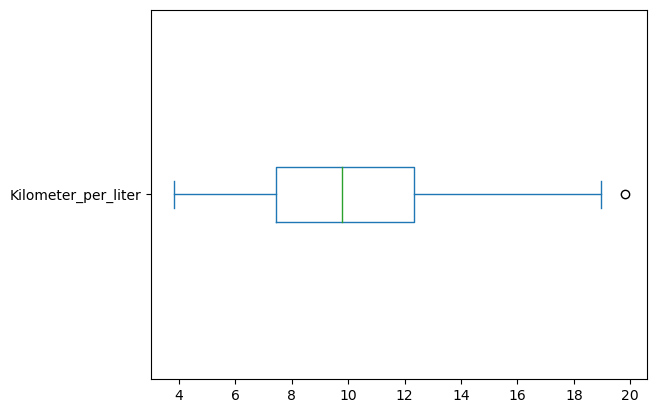

In [121]:
y.plot(kind='box',vert=False)

<AxesSubplot: ylabel='Frequency'>

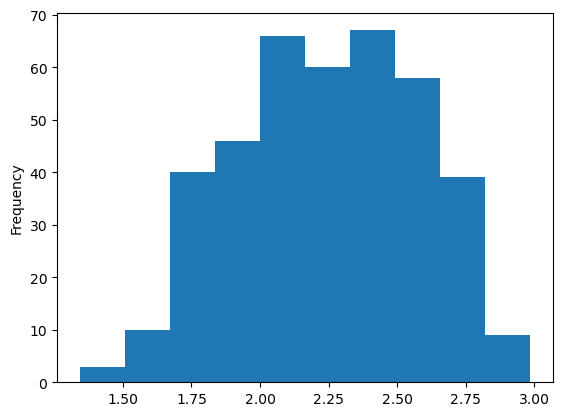

In [122]:
np.log(y).plot(kind='hist')

<AxesSubplot: >

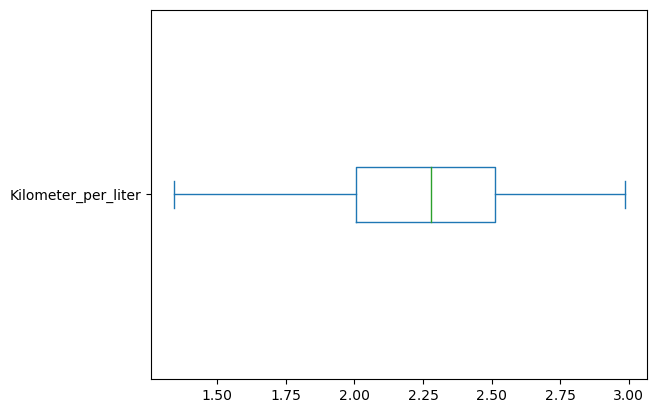

In [123]:
np.log(y).plot(kind='box',vert=False)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
reg=LinearRegression()

In [126]:
reg_model=reg.fit(X,np.log(y))

In [127]:
reg_model.score(X,np.log(y)) #R-square

0.8789281392153276

In [128]:
regtestpredict=reg_model.predict(X)

In [129]:
rmse=np.sqrt(mean_squared_error(y,regtestpredict))
rmse

8.323569133670851

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
tree=DecisionTreeRegressor(max_depth=3)

In [132]:
treemodel=tree.fit(X,y)

In [133]:
treemodel.score(X,y)  #R-square

0.8447418371965489

In [134]:
tree_pred=treemodel.predict(X)

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
rmse1=np.sqrt(mean_squared_error(y,tree_pred))
rmse1

1.3076766627081067

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
RF=RandomForestRegressor(max_depth=5)

In [139]:
RFmodel=RF.fit(X,y)  #R-square

In [140]:
RFmodel.score(X,y)  #R-square

0.9388871939118857

In [141]:
RFpredict=RFmodel.predict(X)

In [142]:
rmse2=np.sqrt(mean_squared_error(y,RFpredict))
rmse2

0.8204257156804802

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
gbm=GradientBoostingRegressor(max_depth=2)

In [145]:
gbmmodel=gbm.fit(X,y)

In [146]:
gbmmodel.score(X,y)  #R-square

0.9395608499856919

In [147]:
gbmpredict=gbmmodel.predict(X)

In [148]:
rsme4=np.sqrt(mean_squared_error(y,gbmpredict))
rsme4

0.8158913444283357